<a href="https://colab.research.google.com/github/swamini-21/Exploratory-Data-Analysis/blob/main/TASK3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Sparks Foundation**

**NAME:Swamini Deepak Sontakke**

**Task 3:Exploratory Data Analysis on SampleSuperstore dataset **

## Importing necssary libraries

In [1]:
%matplotlib inline
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # for visualization
import seaborn as sns # for visualization

# Importing data set

In [2]:
df=pd.read_csv("/content/SampleSuperstore.csv")
df.head() # checking the data

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
df.shape # getting no of rows and columns

(9994, 13)

# Checking For Null Values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


##### Since there are 9994 rows and 9994 non null values,we can say that dataset does not have any null values

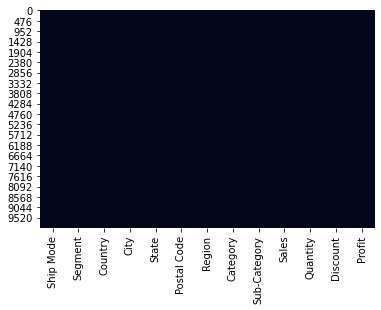

In [5]:
# using heatmap to check null values
sns.heatmap(df.isnull(), cbar=False)

##### From the heatmap we confirm that there are no null values present

# Checking For Duplicate Values

In [6]:
df.duplicated().sum()

17

In [7]:
# since we have duplicate values, lets remove them
df.drop_duplicates(subset=None,keep='first',inplace=True)
df.duplicated().sum() # checking after removal of duplicates

0

In [8]:
df = df.drop(['Postal Code'],axis = 1)    #dropping postal code columns

In [9]:
df.shape

(9977, 12)

##### so after removal of duplicate rows and the postal code column, rows have reduced form 9994 to 9977 and columns have reduced from 13 to 12


# Checking Sales & Profit of Products Dependig On various Factors

#### Sales and Profit of products depending on the Category of products 

In [10]:
sale_profit_sum_cat = df.groupby('Category')['Sales','Profit'].sum()
sale_profit_sum_cat

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Sales,Profit
Category,,
Furniture,741306.3133,18421.8137
Office Supplies,718735.2440,122364.6608
Technology,836154.0330,145454.9481


Text(0, 0.5, 'Sales and Profit')

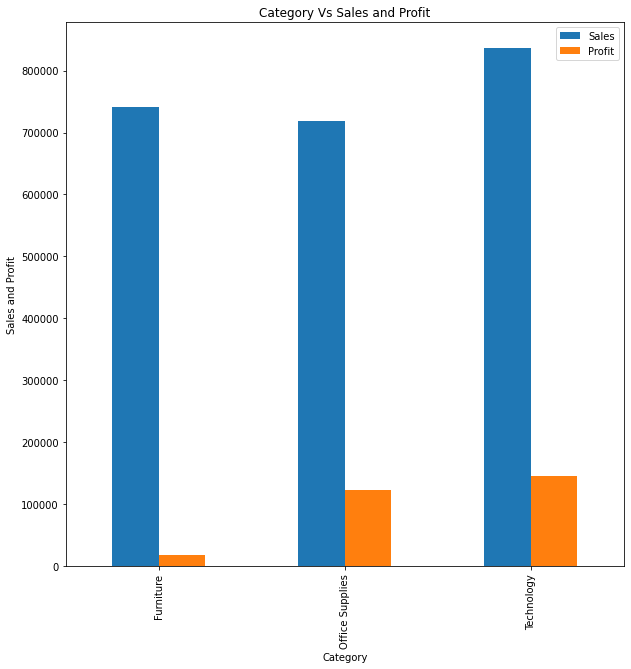

In [12]:
# visualizing above result
sale_profit_sum_cat.plot.bar(figsize = (10,10),title = "Category Vs Sales and Profit")
plt.ylabel("Sales and Profit")

##### **Observation 1:**We observe that Technology and Furniture Categories have the Highest Sales, but Office Supplies and Technology have higher Profit


##### Lets take a look at the sub categories of products

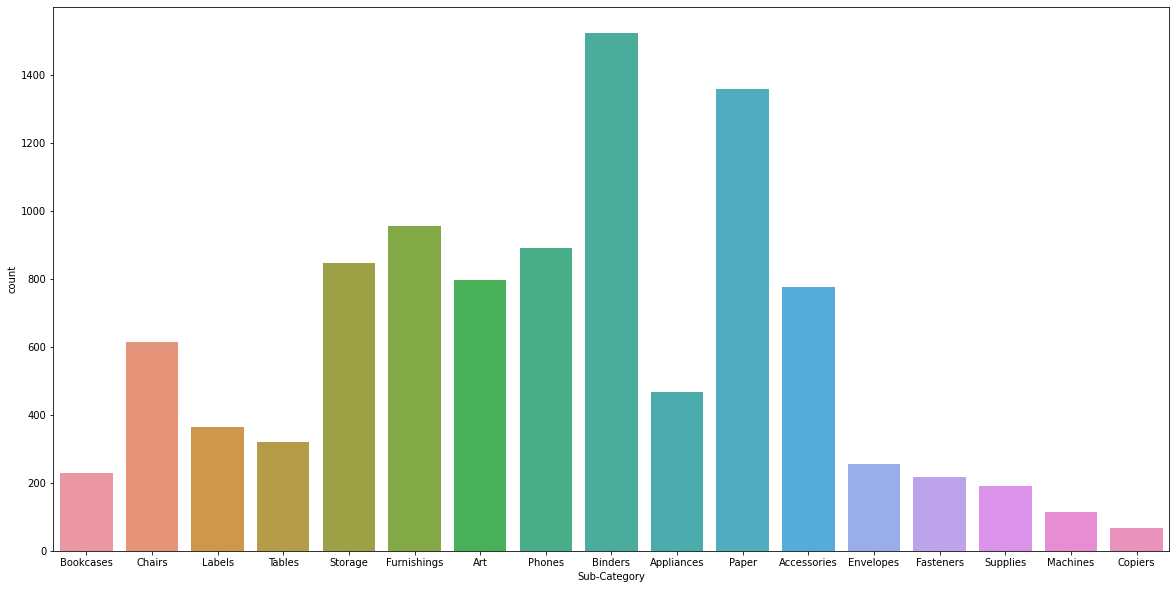

In [13]:
plt.figure(figsize=(20,10))
sns.countplot(x=df['Sub-Category']) # Checking for sub-category of products

#### Sales and Profit of products depending on the Sub-Category of products

In [14]:
sale_profit_sum_subcat = df.groupby('Sub-Category')['Sales','Profit'].sum()
sale_profit_sum_subcat

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Sales,Profit
Sub-Category,,
Accessories,167380.3180,41936.6357
Appliances,107532.1610,18138.0054
Art,27107.0320,6524.6118
Binders,203409.1690,30228.0003
Bookcases,114879.9963,-3472.5560
Chairs,327777.7610,26567.1278
Copiers,149528.0300,55617.8249
Envelopes,16476.4020,6964.1767
Fasteners,3024.2800,949.5182


Text(0, 0.5, 'Sales and Profit')

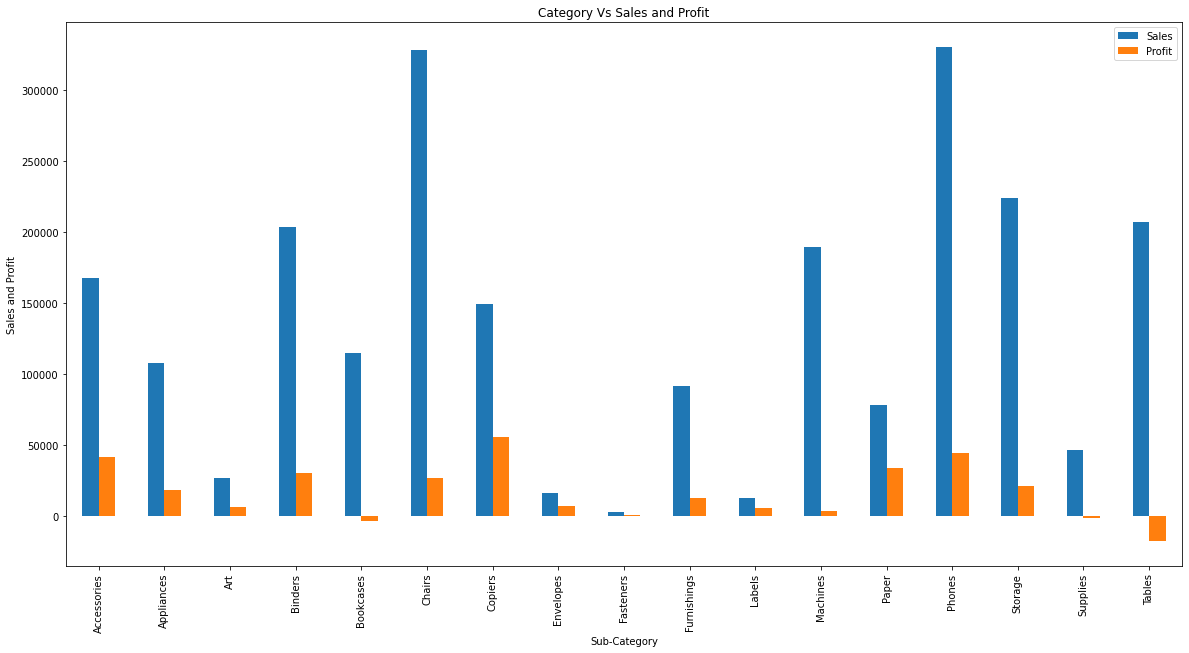

In [16]:
# visualizing above result
sale_profit_sum_subcat.plot.bar(figsize = (20,10),title = "Category Vs Sales and Profit")
plt.ylabel("Sales and Profit")

##### **Observation 2**: a)Phones and chairs sub category have the highest sales, but profit for Phones id greater than that of chairs.Also copiers have less sale but profit is more.
##### b) Tables and Bookcases face a huge loses 


#### Sales and Profit of products depending on the Region of purchase

In [17]:
sale_profit_sum_reg = df.groupby('Region')['Sales','Profit'].sum()
sale_profit_sum_reg

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Sales,Profit
Region,,
Central,500782.8528,39655.8752
East,678435.1960,91506.3092
South,391721.9050,46749.4303
West,725255.6365,108329.8079


Text(0, 0.5, 'Sales and Profit')

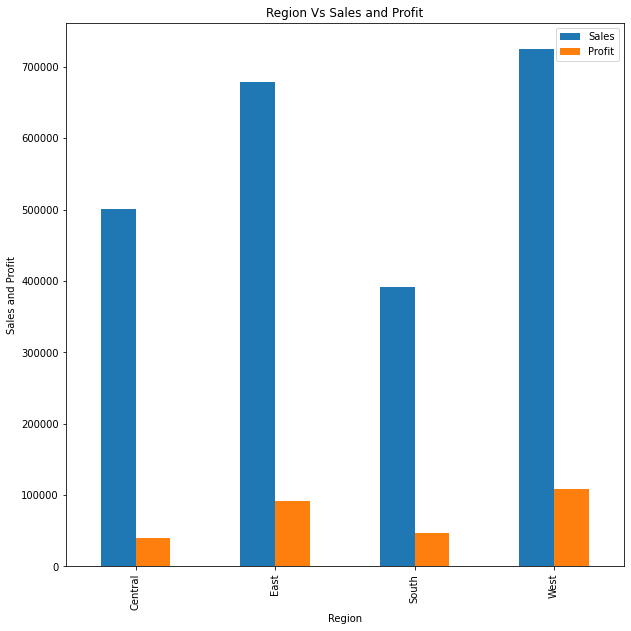

In [18]:
# visualizing above result
sale_profit_sum_reg.plot.bar(figsize = (10,10),title = "Region Vs Sales and Profit")
plt.ylabel("Sales and Profit")

##### **observation 3:**Sales and Profit is more in the West and the East region,and low in the central and South region

#### Lets Check out the states 

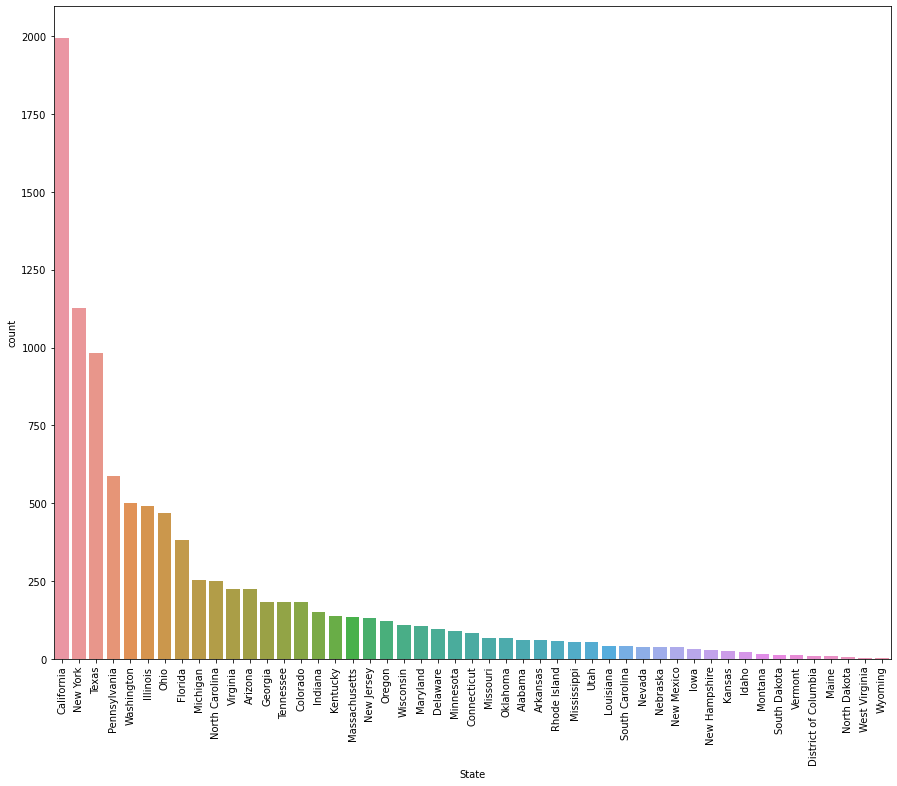

In [19]:
plt.figure(figsize=(15,12))
sns.countplot(x='State',data=df,order=df['State'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

##### **Observation 4:**More no of buyers are from California & New York whereas its least in West Virgnia & Wyoming

#### Sales and Profit of products depending on the State from which purchase is made

In [20]:
sale_profit_sum_state = df.groupby('State')['Sales','Profit'].sum()
sale_profit_sum_state

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Sales,Profit
State,,
Alabama,19510.6400,5786.8253
Arizona,35282.0010,-3427.9246
Arkansas,11678.1300,4008.6871
California,457576.2715,76330.7891
Colorado,32108.1180,-6527.8579
Connecticut,13384.3570,3511.4918
Delaware,27451.0690,9977.3748
District of Columbia,2865.0200,1059.5893
Florida,89473.7080,-3399.3017


Text(0, 0.5, 'Sales and Profit')

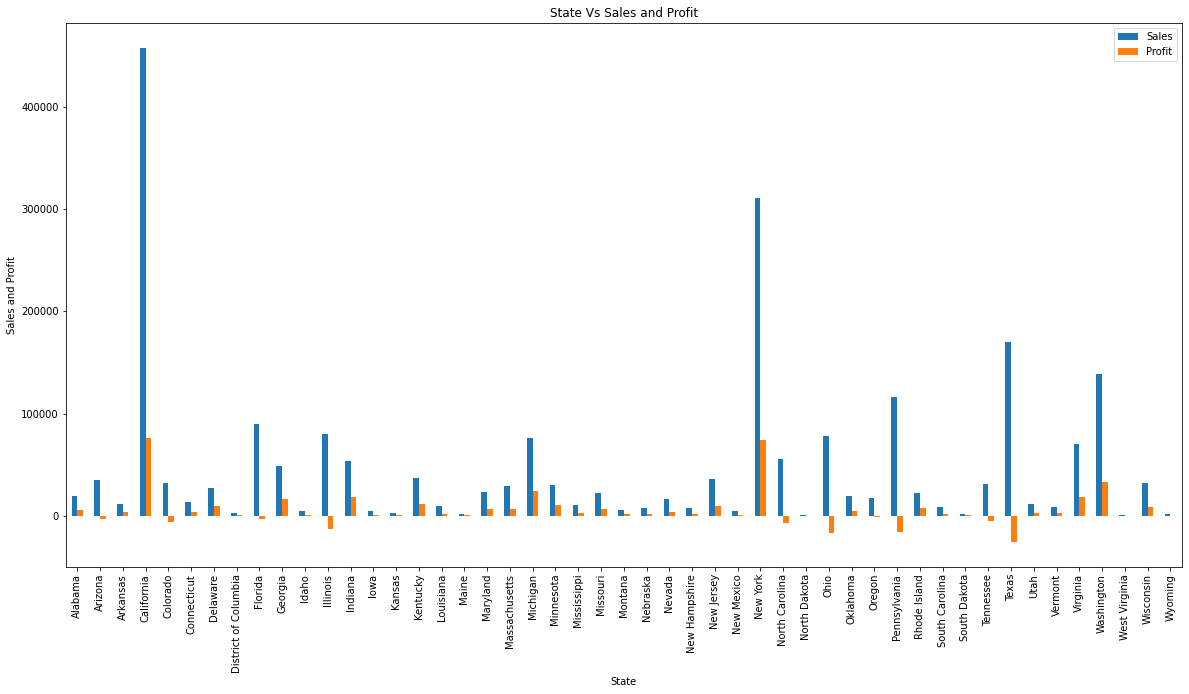

In [21]:
# visualizing above results
sale_profit_sum_state.plot.bar(figsize = (20,10),title = "State Vs Sales and Profit")
plt.ylabel("Sales and Profit")

##### **Observation 5:** Lowest profit is obtained form Texas and Ohio and highest from California and New York


#### Sales and Profit of products depending on the Segment 

In [22]:
sale_profit_sum_seg = df.groupby('Segment')['Sales','Profit'].sum()
sale_profit_sum_seg

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Sales,Profit
Segment,,
Consumer,1.160833e+06,134007.4413
Corporate,7.060701e+05,91954.9798
Home Office,4.292927e+05,60279.0015


Text(0, 0.5, 'Sales and Profit')

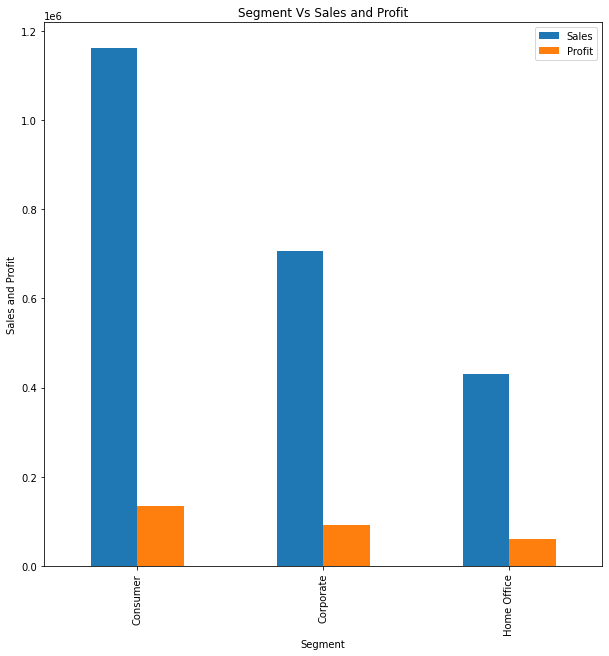

In [23]:
# visualizing above results
sale_profit_sum_seg.plot.bar(figsize = (10,10),title = "Segment Vs Sales and Profit")
plt.ylabel("Sales and Profit")

##### **Observation 6:**Maximum sale & profit is for the Consumer Segment 

#### Sales and Profit of products depending on the Shiping Mode of Products

In [24]:
sale_profit_sum_ship = df.groupby('Ship Mode')['Sales','Profit'].sum()
sale_profit_sum_ship

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Sales,Profit
Ship Mode,,
First Class,3.513805e+05,48953.6561
Same Day,1.283217e+05,15871.8869
Second Class,4.591770e+05,57446.6516
Standard Class,1.357316e+06,163969.2280


Text(0, 0.5, 'Sales and Profit')

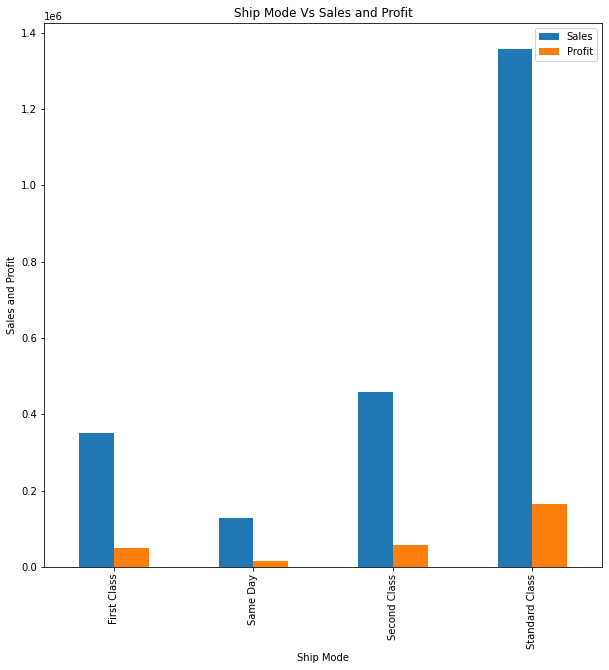

In [25]:
# visualizing above results
sale_profit_sum_ship.plot.bar(figsize = (10,10),title = "Ship Mode Vs Sales and Profit")
plt.ylabel("Sales and Profit")

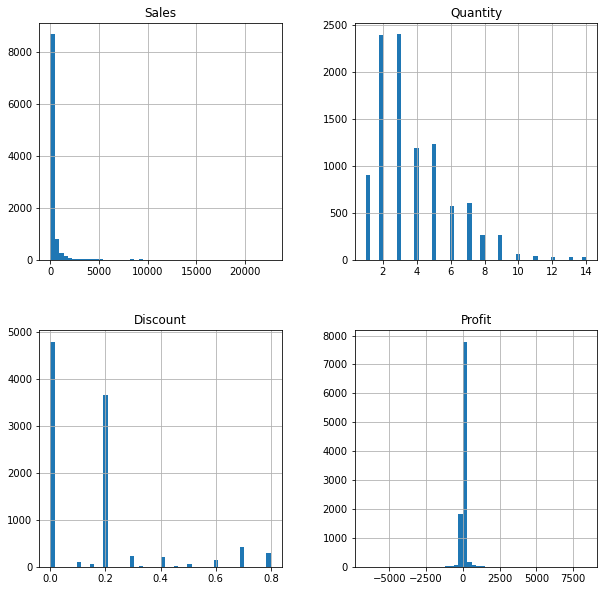

In [26]:
df.hist(figsize=(10,10),bins=50)
plt.show()

##### **Observation 8:**a)Discount mostly given is from 0-20% 
##### b)Quantity purchased by most of the customers is 2-3




#### Plotting Profit V/S Sales

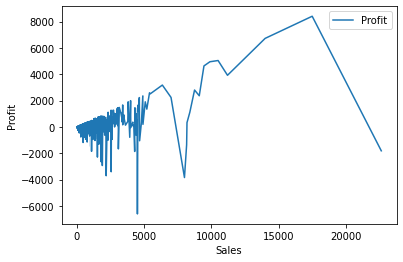

In [27]:
sns.lineplot(x='Sales',y='Profit',label='Profit',data=df)
plt.legend()
plt.show()

##### **Observation 9:**As sales increases profit also increases


##### Plotting Profit V/S Discount

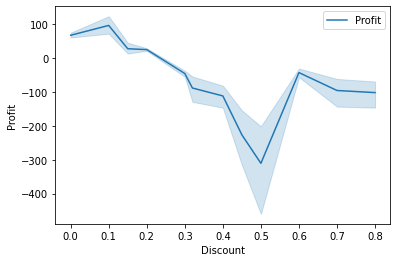

In [28]:
sns.lineplot(x='Discount',y='Profit',label='Profit',data=df)
plt.legend()
plt.show()

##### **Observation 10:** Here we cannot infer any correlation between Profit & Discount

#### Plotting Profit VS Quantity

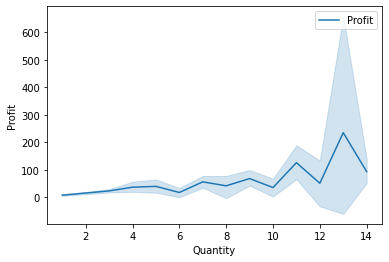

In [29]:
sns.lineplot(x='Quantity',y='Profit',label='Profit',data=df)
plt.legend()
plt.show()

##### **Observation 11:**Higher the quantity greater the Profit


# Observation Summary:

1)The technology category of products has the hihest sales and profit.

2)Furniture category have the lowest Profit.

3)The store has wide variety of office supplies especially in binders and paper department

4)Phones have highest sales and profits

5)Tables have the highest loses

6)Sales and profit is the highest in the western region and lowest in the central region

7)California & New york has the highest no of customers & hence Profit & Sales is maximum in these states and lowest in Texas

8)Profit is high for Consumer Segment

9)Profit and sales are higher for Standard shipment as more customers are opt for it.

10)Customers tend to buy 2 to 3 products together

11)Mostly discount is given in the range of 0 to 20%

12)With increase in sales Profit increases

13)With increase in Quantity Profit increases